In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


In [30]:
Image=cv2.imread('/Users/Ishpreet/Downloads/hinditext.jpeg', 0)
I=Image.copy()


#Otsu Thresholding
blur = cv2.GaussianBlur(I,(1,1),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

<IPython.core.display.Javascript object>


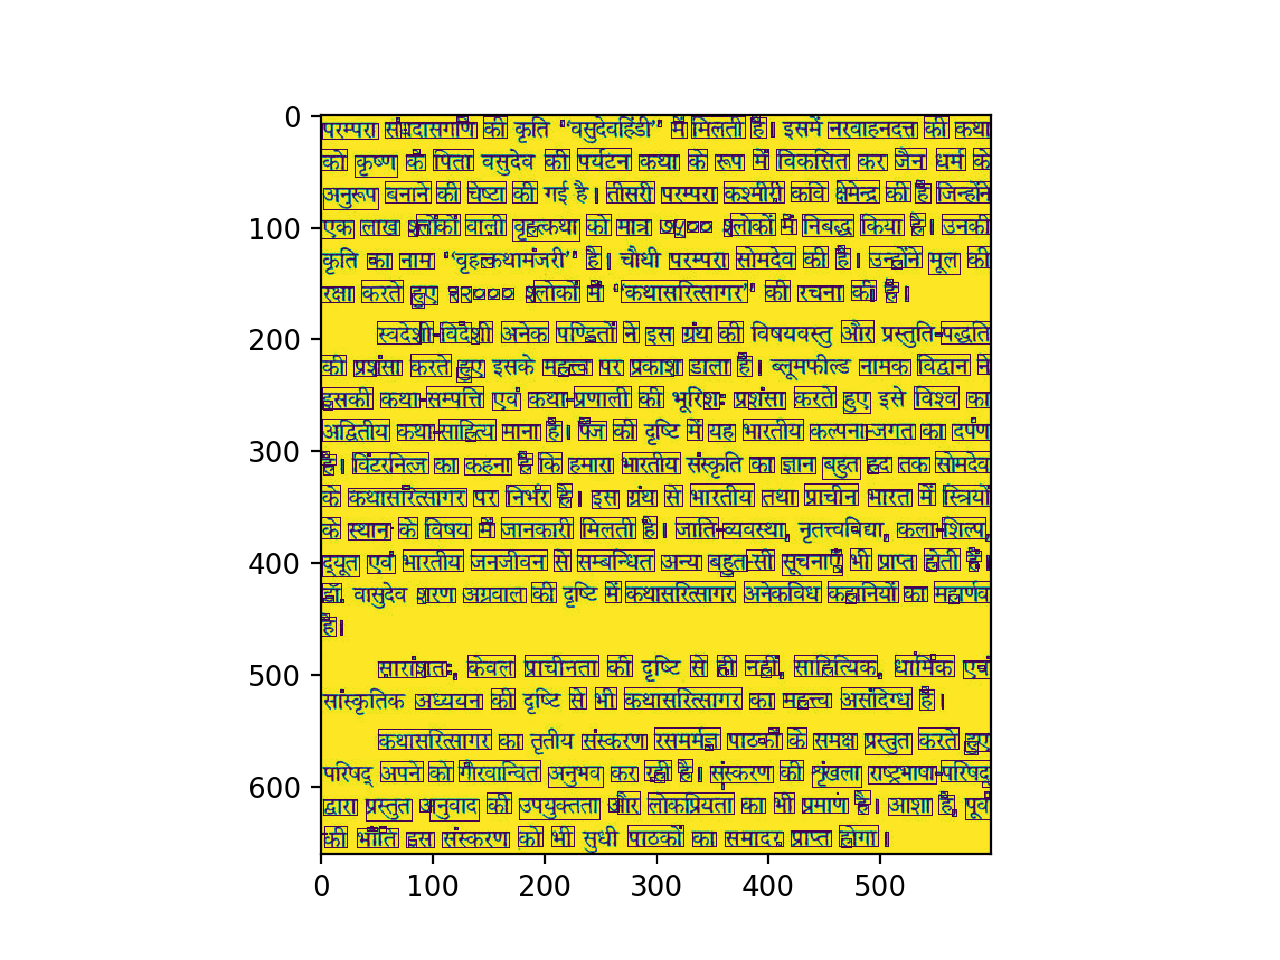

In [31]:


image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

#print(i.shape)
chars = []


for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        
        if h>12:
            chars.append((x,y,w,h))

        if h>20:
            continue

        cv2.rectangle(I, (x, y), (x + w, y + h), (0, 0, 0),1)
        
        
plt.imshow(I)



In [40]:
x1,y1,w1,h1 = chars[160]

<IPython.core.display.Javascript object>


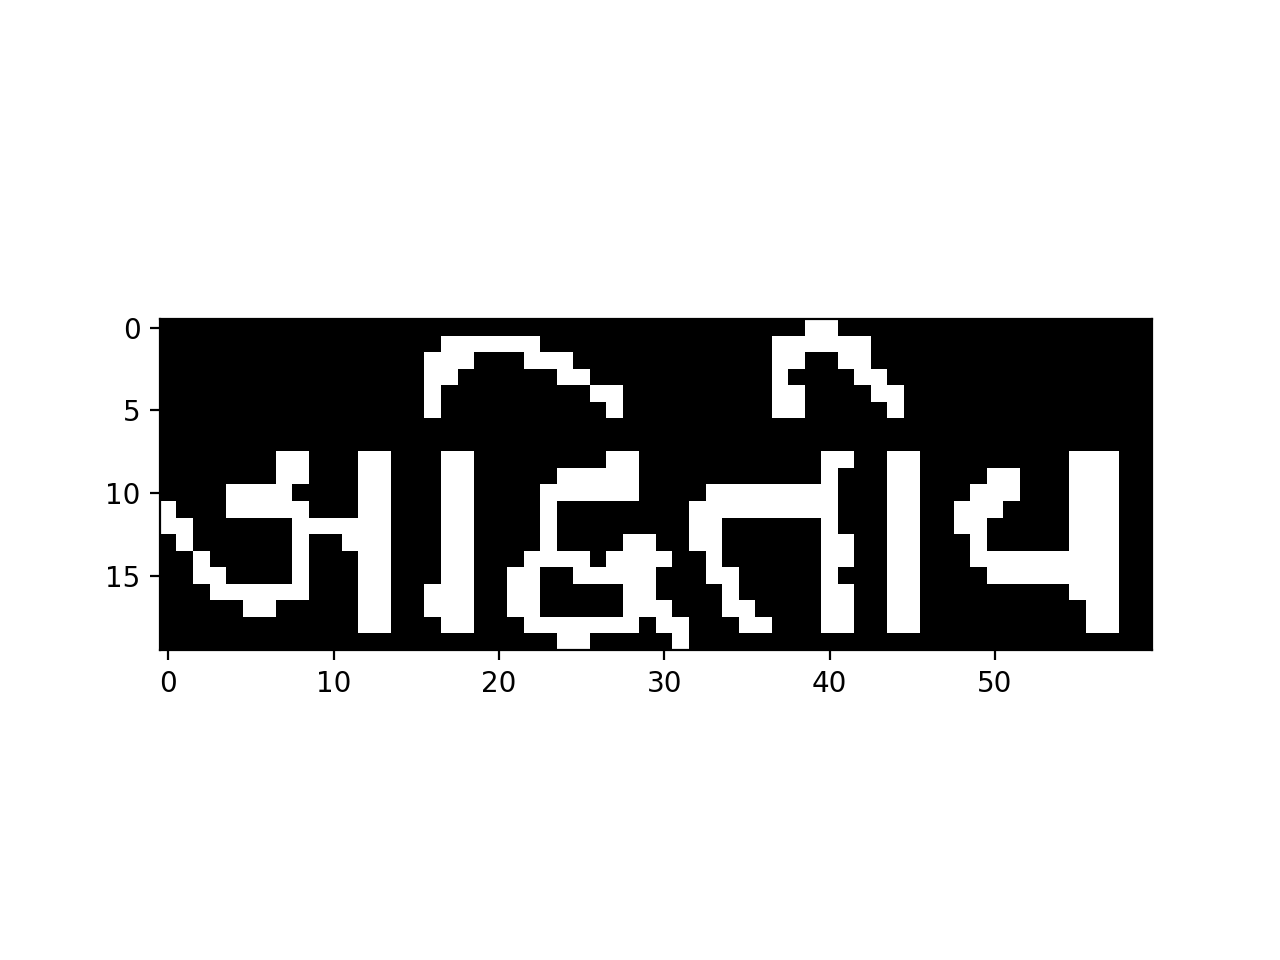

In [41]:
hinimg = th[y1:y1+h1,x1:x1+w1]
plt.imshow(hinimg)

In [25]:
#hinimg = th.copy()

In [42]:
r,c = hinimg.shape
s = []
s1=0
ms = 0

for i in range(r):
    s1=0   
    for j in range(c):
        
        s1+=hinimg[i][j]
        
    if s1>ms:
        ms = s1
        
    s.append(s1)
        
        
rows2del = []
        
for i in range(r):
  
    if s[i]>=0.80*ms:
        
        for j in  range(c):
            
            hinimg[i][j] = 0
            
plt.imshow(hinimg,cmap='gray')
        
        
hini = hinimg.copy()
   
char = []

image1, contours1, hierarchy1 = cv2.findContours(hini,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

for contour in contours1:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        
        char.append((x,y,w,h))

        #cv2.rectangle(hini, (x, y), (x + w, y + h), (255, 255, 255),1)
        
        
        
        


#plt.imshow(hinimg)


In [27]:
len(char)

1586

<IPython.core.display.Javascript object>


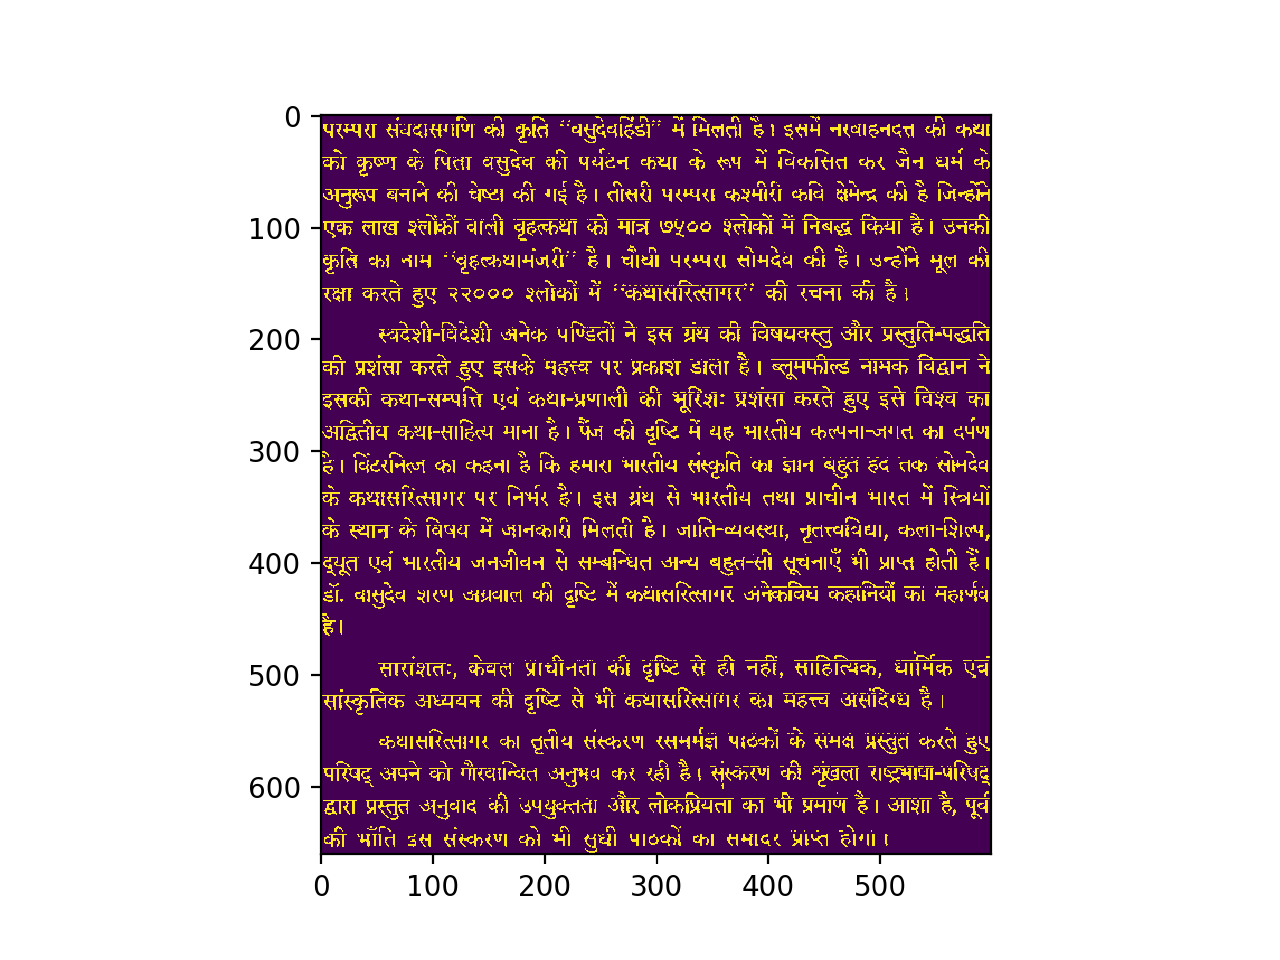

In [28]:
plt.imshow(hinimg)

In [98]:
n=1

himg = hini[char[n][1]:char[n][1]+char[n][3],char[n][0]:char[n][0]+char[n][2]]
        
plt.imshow(himg,cmap='gray')

[(282, 358, 456, 360), (31, 358, 155, 360), (91, 330, 372, 357), (151, 251, 249, 278), (40, 251, 104, 276), (307, 224, 444, 244), (251, 220, 313, 245), (141, 219, 257, 250), (42, 220, 111, 245), (230, 190, 297, 214), (357, 189, 403, 214), (294, 188, 356, 219), (178, 188, 232, 219), (36, 188, 186, 219), (37, 159, 148, 183), (399, 158, 440, 183), (278, 157, 403, 188), (202, 157, 285, 188), (142, 158, 205, 183), (283, 127, 406, 152), (227, 127, 288, 152), (173, 127, 227, 152), (37, 126, 180, 157), (302, 96, 430, 121), (242, 96, 284, 121), (166, 96, 242, 121), (38, 96, 161, 121), (372, 70, 443, 94), (306, 64, 374, 95), (192, 64, 312, 95), (82, 64, 202, 95), (43, 62, 85, 90), (112, 7, 357, 43), (467, -28, 481, 396), (338, 0, 439, 1), (45, 0, 121, 1), (-1, -28, 15, 396)]


<IPython.core.display.Javascript object>


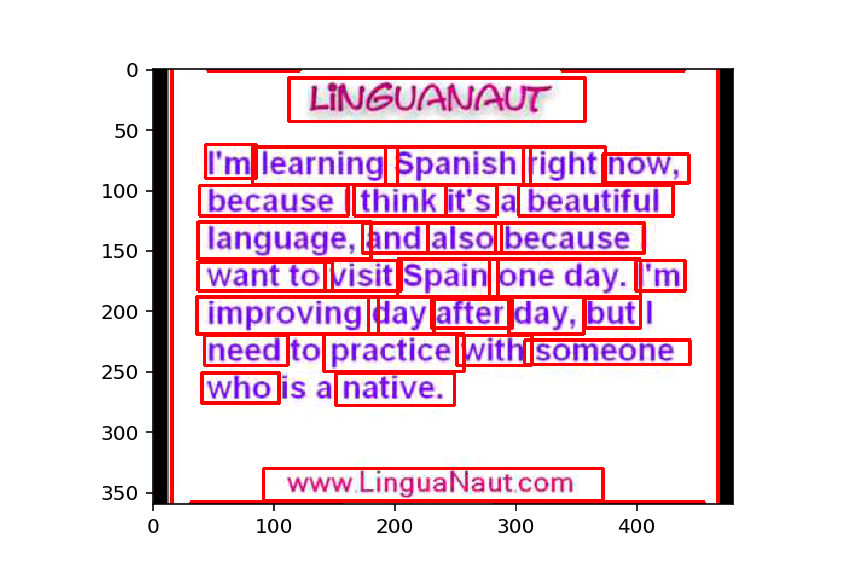

In [29]:
def text_detect(img,ele_size=(8,3)): #
    
    if len(img.shape)==3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    #img_sobel = cv2.Sobel(img,cv2.CV_8U,1,0)#same as default,None,3,1,0,cv2.BORDER_DEFAULT)
    #print(len(img), len(img[0]))
#     for i in range (len(img)) :
#         for j in range (len(img[0])) :
#             img[i][j] = 255 - img[i][j]
            
    img_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 115, 1)
    #print (img_threshold)
    
   
    
    element = cv2.getStructuringElement(cv2.MORPH_RECT,ele_size)
    img_threshold = cv2.morphologyEx(img_threshold,cv2.MORPH_CLOSE,element)
    contours = cv2.findContours(img_threshold,0,1)
    
    Rect = [cv2.boundingRect(i) for i in contours[1] if i.shape[0]>100]
    RectP = [(int(i[0]-i[2]*0.08),int(i[1]-i[3]*0.08),int(i[0]+i[2]*1.1),int(i[1]+i[3]*1.1)) for i in Rect]
    return RectP


img = cv2.imread("./Downloads/englishtext.jpg")

img1 = text_detect(img)

print(img1)



for i in img1:
    cv2.rectangle(img, (i[0], i[1]), (i[2], i[3]), (255, 0, 0), 2)
    
plt.imshow(img, cmap='gray')
